In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib 

/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/james/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/james/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size 

Using matplotlib backend: MacOSX


In [11]:
#load data
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noice = np.random.normal(0,0.05,x_data.shape)  #np.random.normal(正态分布的均值，正态分布的方差，【shape】）
y_data = np.square(x_data)-0.5+noice #y=x^2-0.5+noice
#define placeholder
xs= tf.placeholder(tf.float32,[None,1]) #placeholder(dtype,shape,name)
ys = tf.placeholder(tf.float32,[None,1])


In [22]:
#define the layer
def add_layer(inputs,input_size,output_size,activation_function):
    Weights = tf.Variable(tf.random_normal([input_size,output_size]))
    bias = tf.Variable(tf.zeros([1,output_size])+0.1)
    Wx_plus = (tf.matmul(inputs,Weights)+bias)
    
    if activation_function == None:
        outputs = Wx_plus
    else:
        outputs = activation_function(Wx_plus)
    
    
    
    return outputs






In [26]:

#input - > hidden layer

input_layer = add_layer(xs, 1 , 100 , activation_function = tf.nn.relu)






# output layer
#prediction
prediction = add_layer(input_layer, 100, 1, activation_function = None)






In [36]:


#cost mse

cost = tf.reduce_mean(tf.reduce_sum(tf.square(prediction-ys),reduction_indices=[1]))

#training 

training_op = tf.train.AdamOptimizer(0.01).minimize(cost)

#cost_correct
cost_correct = tf.equal(tf.argmax(prediction,1),tf.argmax(ys,1))
#accuracy
accuracy = tf.reduce_mean(tf.cast(cost_correct, tf.float32))


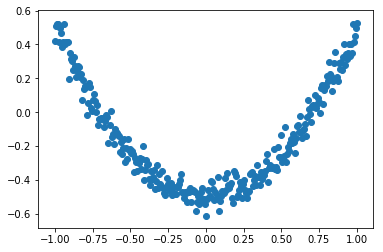

5.341306
1.0
(300, 1)
0.021616276
1.0
(300, 1)
0.005814421
1.0
(300, 1)
0.0039313934
1.0
(300, 1)
0.0032773442
1.0
(300, 1)
0.0030252996
1.0
(300, 1)
0.0028668086
1.0
(300, 1)
0.0027413294
1.0
(300, 1)
0.0026717158
1.0
(300, 1)
0.0026251883
1.0
(300, 1)
0.0025900842
1.0
(300, 1)
0.0025611366
1.0
(300, 1)
0.002531497
1.0
(300, 1)
0.002499829
1.0
(300, 1)
0.0024807572
1.0
(300, 1)
0.002468347
1.0
(300, 1)
0.0024599403
1.0
(300, 1)
0.0024536932
1.0
(300, 1)
0.0024481686
1.0
(300, 1)
0.0024418675
1.0
(300, 1)


In [46]:
# seesion.run
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_data,y_data)
    plt.ion()
    plt.show()
    for i in range(1000):
        sess.run(training_op ,feed_dict={xs:x_data,ys:y_data})
        if i % 50 ==0:
            print(sess.run(cost,feed_dict={xs:x_data,ys:y_data}))
            print(sess.run(accuracy,feed_dict={xs:x_data,ys:y_data}))
            prediction_value = sess.run(prediction, feed_dict={xs: x_data})
            prediction_value.shape
            print( prediction_value.shape)
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction_value = sess.run(prediction, feed_dict={xs: x_data})
            lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
            plt.pause(0.1)